## cosma filing system

* /cosma8/data/dp004/colibre
    * /InitialConditions
        * *not explored*
    * /Runs
        * /L$$$$N$$$$
        * /L$$$_m$
            * *a redirect to the above folders, by particle mass rather than no. of particles*
            * THERMAL_AGN_m$
            * THERMAL_AGN_m$_obsolete
            * HYBRID_AGN_m$
                * *more redirects, not all runs have all 3, some have DMO also*
                * snapshots
                    * *contains 130 snapshot files*
                    * colibre_$$$$
                        * colibre_$$$$.hdf5
                            * *~1MB hdf5 file - a more basic snapshot?*
                        * colibre_$$$$.$.hdf5
                            * *4 ~300MB hdf5 files - the full snapshot? Some are maybe 1/4 the size, likely snipshots*
                * SOAP
                    * colibre_with_SOAP_membership_$$$$.hdf5
                        * *file that tells you what subhalo each particle is in? only for snapshots ~10MB or less*
                    * halo_properties_$$$$.hdf5
                        * *the SOAP file? also only snapshots. A few GB, but depends on the run, L012_m6 is 100MB at most*
                    * membership_$$$$
                        * membership_$$$$.$$.hdf5
                            * *I got no clue, there's almost 100 of these. ~300MB each*

    * /Tables
        * *contains CoolingTables, dust_yields, photometry. etc. and some related .sh scripts. Likely used by the sims, I don't need to see it*

## possible starting simulations

* L012_m5
    * smallest, highest-res sim
    * all runs are obsolete
    * only 12 SOAP catalogues

* L012_m6
    * smallest, middle-res sim
    * has a thermal AGN run
    * only 12 SOAP catalogues
        * z = {0, 0.1, 0.5, 1, 2, 3, 4, 5, 6, 7?, 8, 9?}

* L025_m5
    * small, highest-res sim
    * has a non-obsolete thermal AGN run (approx_grav?)
    * only 25 SOAP catalogues

* L025_m6
    * small, middle-res sim
    * has a thermal AGN run
    * a LOT of SOAP catalogues - snipshots from 40-120

Some reading on the Slack leads to me believe that SOAP catalogues are often only made on request - but 12 redshifts might be enough :)



In [69]:
import unyt
import swiftsimio as sw
import matplotlib.pyplot as plt

In [2]:
data = sw.load("cosmo_volume_example.hdf5") # loading in a snapshot??

In [26]:
meta = data.metadata
boxsize = meta.boxsize
boxsize.convert_to_units(unyt.Mpc)


print(boxsize)

[142.24751067 142.24751067 142.24751067] Mpc


In [24]:
boxsize.convert_to_units(unyt.ly)
print(boxsize)

[4.63959237e+08 4.63959237e+08 4.63959237e+08] ly


In [6]:
dir(meta)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 'a',
 'black_holes_properties',
 'boxsize',
 'code',
 'code_info',
 'compiler_info',
 'cosmology',
 'cosmology_raw',
 'dark_matter_properties',
 'diffusion_info',
 'dimension',
 'extract_cosmology',
 'filename',
 'gas_gamma',
 'gas_properties',
 'get_mapping_metadata',
 'get_metadata',
 'get_named_column_metadata',
 'get_nice_name',
 'gravity_scheme',
 'handle',
 'header',
 'homogeneous_arrays',
 'hydro_info',
 'hydro_scheme',
 'initial_mass_table',
 'internal_code_units',
 'library_info',
 'load_groups',
 'masking_valid',
 'mass_tabl

In [46]:
print(meta.hydro_info)
print('\nN_BH:',meta.n_black_holes)
print('N_DM:',meta.n_dark_matter)
print('N_gas:',meta.n_gas)
print('N_stars:',meta.n_stars)
print('\nz:',meta.redshift)
print('Run name:',meta.run_name)
print('Snapshot date:',meta.snapshot_date)
print('subgrid:',meta.subgrid_scheme)

SPHENIX (Borrow+ 2020)
Wendland C2 in 3D
$\eta$ = 1.23 (57.27 $N_{ngb}$)
$C_{\rm CFL}$ = 0.10

N_BH: 150
N_DM: 262144
N_gas: 261992
N_stars: 0

z: 0.0
Run name: Untitled SWIFT simulation
Snapshot date: 13:59:18 2020-07-08 BST
subgrid: {'Chemistry Model': np.bytes_(b'EAGLE'), 'Cooling Model': np.bytes_(b'EAGLE'), 'Entropy floor': np.bytes_(b'EAGLE'), 'Feedback Model': np.bytes_(b'EAGLE'), 'Tracers': np.bytes_(b'EAGLE')}


In [27]:
print(data.metadata.gas_properties.field_names)

['coordinates', 'densities', 'diffusion_parameters', 'element_mass_fractions', 'energies_received_from_agnfeedback', 'entropies', 'fofgroup_ids', 'heated_by_agnfeedback', 'heated_by_sniifeedback', 'internal_energies', 'iron_mass_fractions_from_snia', 'laplacian_internal_energies', 'masses', 'masses_from_agb', 'masses_from_snii', 'masses_from_snia', 'maximal_temperature_scale_factors', 'maximal_temperatures', 'metal_mass_fractions', 'metal_mass_fractions_from_agb', 'metal_mass_fractions_from_snii', 'metal_mass_fractions_from_snia', 'particle_ids', 'pressures', 'smoothed_element_mass_fractions', 'smoothed_iron_mass_fractions_from_snia', 'smoothed_metal_mass_fractions', 'smoothing_lengths', 'star_formation_rates', 'temperatures', 'velocities', 'velocity_divergence_time_differentials', 'velocity_divergences', 'viscosity_parameters']


In [28]:
x_gas = data.gas.coordinates
rho_gas = data.gas.densities

In [55]:
x_gas.shape

(261992, 3)

In [ ]:
print(data.gas.element_mass_fractions)
data.gas.element_mass_fractions.silicon

Named columns instance with ['hydrogen', 'helium', 'carbon', 'nitrogen', 'oxygen', 'neon', 'magnesium', 'silicon', 'iron'] available for "element_mass_fractions"


cosmo_array([0., 0., 0., ..., 0., 0., 0.], dtype=float32, units='(dimensionless)', comoving=True)

In [61]:
physical_rho_gas = rho_gas.to_physical()

print(rho_gas[0])
print(physical_rho_gas[0])
# this snapshot is at z=0 so not really helpful :)

0.47491246 10000000000.0*Msun/Mpc**3
0.47491246 10000000000.0*Msun/Mpc**3


In [67]:
catalogue = load("soap_example.hdf5")
dir(catalogue)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'bound_subhalo',
 'create_datasets',
 'filename',
 'get_metadata',
 'get_units',
 'input_halos',
 'input_halos_fof',
 'input_halos_hbtplus',
 'mask',
 'metadata',
 'soap',
 'spherical_overdensity_200_crit',
 'spherical_overdensity_200_mean',
 'spherical_overdensity_500_crit',
 'units']

In [66]:
dir(catalogue.bound_subhalo) # I think this snapshot is DMO?

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_centre_of_mass',
 '_centre_of_mass_velocity',
 '_maximum_circular_velocity',
 '_maximum_circular_velocity_radius_unsoftened',
 '_maximum_circular_velocity_unsoftened',
 '_number_of_dark_matter_particles',
 '_spin_parameter',
 '_total_mass',
 'centre_of_mass',
 'centre_of_mass_velocity',
 'filename',
 'generate_empty_properties',
 'group',
 'group_metadata',
 'group_name',
 'maximum_circular_velocity',
 'maximum_circular_velocity_radius_unsoftened',
 'maximum_circular_velocity_unsoftened',
 'metadata',
 'number_of_dark_matter_particles',
 'spin_parameter',
 'total_mass',
 'units']

In [85]:
filename = "cosmo_volume_example.hdf5"
mask = sw.mask(filename)
boxsize = mask.metadata.boxsize # so the mask is the same size as the (not yet opened) file

load_region = [[0.0*b, 0.5*b] for b in boxsize] # 3x2 list, defines the corners of the box
load_region[2] = [0.0*boxsize[2],1.0*boxsize[2]] # don't cut the z-direction

mask.constrain_spatial(load_region) # sets the mask to do its thing

data_masked = sw.load(filename, mask=mask)

In [86]:
x_gas_masked = data_masked.gas.coordinates
rho_gas_masked = data_masked.gas.densities

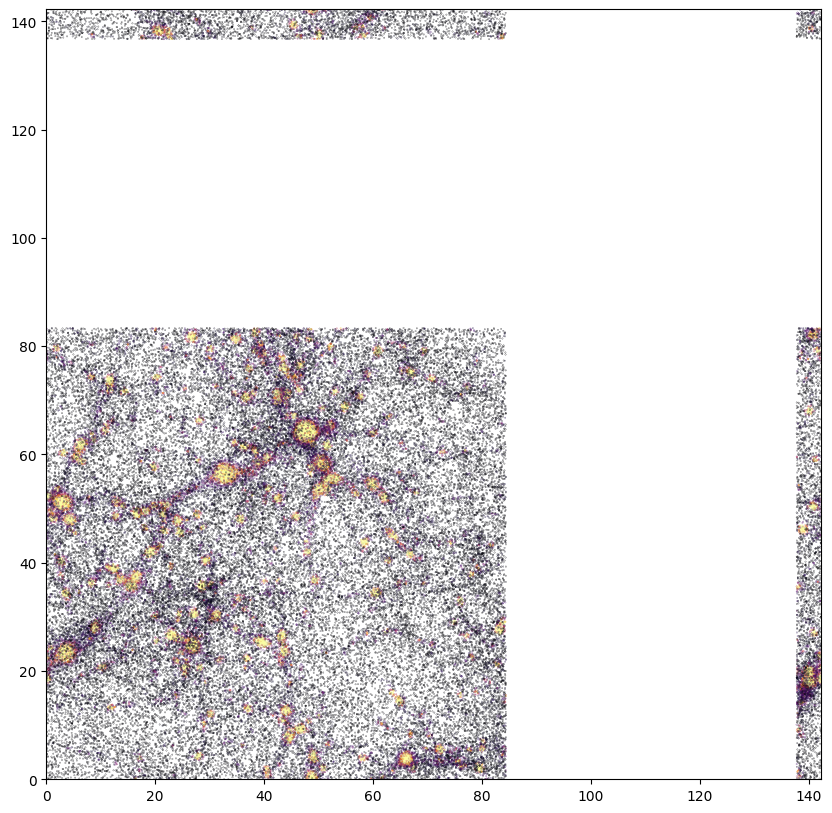

In [87]:
fig,ax =plt.subplots(figsize=(10,10))

ax.scatter(x_gas_masked[:,0],x_gas_masked[:,1],s=0.03,c=rho_gas_masked,vmin=0,vmax=100,cmap='inferno')
ax.set_xlim((0,boxsize[0]))
ax.set_ylim((0,boxsize[1]))

plt.show()

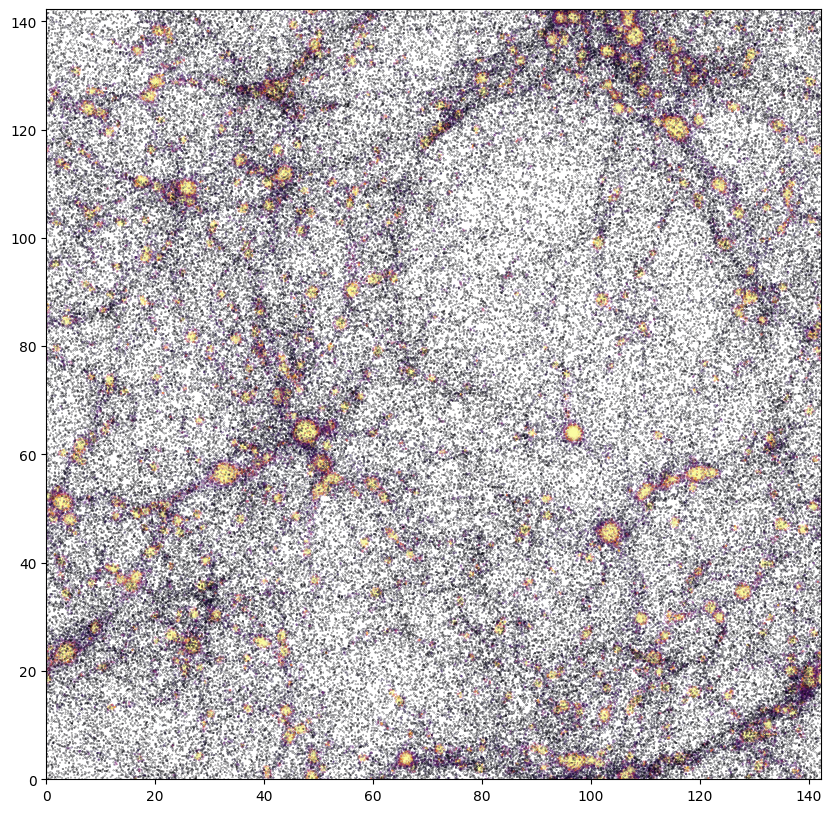

In [84]:
fig,ax =plt.subplots(figsize=(10,10))

ax.scatter(x_gas[:,0],x_gas[:,1],s=0.03,c=rho_gas,vmin=0,vmax=100,cmap='inferno')
ax.set_xlim((0,boxsize[0]))
ax.set_ylim((0,boxsize[1]))

plt.show()

In [ ]:
# can also mask by density, multiple spatial masks, etc. etc.

## Visualisation

In [96]:
from swiftsimio.visualisation.projection import project_gas
from matplotlib.colors import LogNorm

data = sw.load("cosmo_volume_example.hdf5")

mass_map = project_gas(
    data,
    resolution=1024,
    project="masses",
    parallel=True,
    periodic=True
)

mass_map.convert_to_units(unyt.msun / unyt.kpc**2)

In [95]:
plt.imsave("gas_surface_dens_map.png", LogNorm()(mass_map.value), cmap="viridis")

In [97]:
#mass-weighted temperature map

data.gas.mass_weighted_temps = data.gas.masses * data.gas.temperatures

# this will have units of msun (since it is a mass map) / mpc^2 (since I am projecting into 2D)
mass_map = project_gas(
    data,
    resolution=1024,
    project="masses",
    parallel=True,
    periodic=True
)

# this will have units of K * msun (since it is a mass-weighted temperature map) / mpc^2 (since I am projecting into 2D)
mass_weighted_temp_map = project_gas(
    data,
    resolution=1024,
    project="mass_weighted_temps",
    parallel=True,
    periodic=True
)

temp_map = mass_weighted_temp_map / mass_map

temp_map.convert_to_units(unyt.K)

plt.imsave("mw_temp_map.png", LogNorm()(mass_weighted_temp_map.value), cmap="twilight")
plt.imsave("temp_map.png", LogNorm()(temp_map.value), cmap="twilight")

